# Linear Regression and Train/Test Split challenge - Kalgi Shah


### Date: 9th Oct'17

### Challenge 1 

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

movies = pd.read_csv('/home/kalgi/ds/metis/sf17_ds8/challenges/challenges_data/2013_movies.csv')
movies

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00


7561750670100682.0

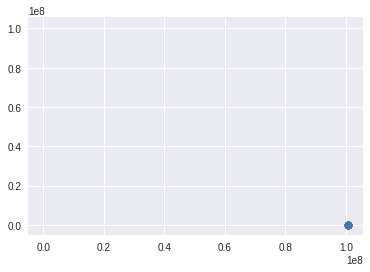

In [262]:
movies['constant'] = 1
X=movies.loc[:,['Title','Budget',
       'Director', 'Rating', 'Runtime',
        'ReleaseDate','constant']]
y=movies['DomesticTotalGross']

selected_columns_1 = ['constant']
lr_model1 = LinearRegression()
lr_model1.fit(X.loc[:,selected_columns_1],y)

%matplotlib inline
lr_model1.coef_, lr_model1.intercept_

pred1 = lr_model1.predict(X.loc[:,selected_columns_1])

plt.scatter(pred1,X['constant'],alpha=.3)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1)

np.mean((pred1 - y)**2)

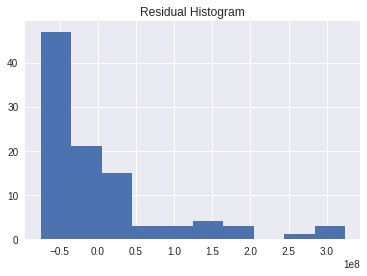

In [263]:
error = y - pred1
plt.hist(error)
plt.title("Residual Histogram")

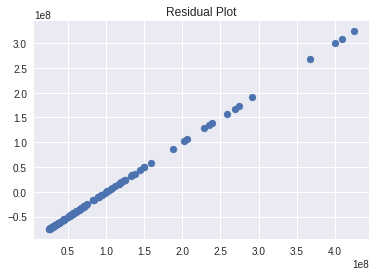

In [264]:
plt.scatter(y, y - pred1)
plt.title("Residual Plot")

### Challenge2

In [265]:
movies = movies.fillna(0)
X=movies.loc[:,['Title','Budget',
       'Director', 'Rating', 'Runtime',
        'ReleaseDate','constant']]
y=movies['DomesticTotalGross']

selected_columns_1 = ['constant','Budget']
lr_model1 = LinearRegression()
lr_model1.fit(X.loc[:,selected_columns_1],y)

%matplotlib inline
lr_model1.coef_, lr_model1.intercept_

pred1 = lr_model1.predict(X.loc[:,selected_columns_1])

np.mean((pred1 - y)**2)

5710838561682511.0

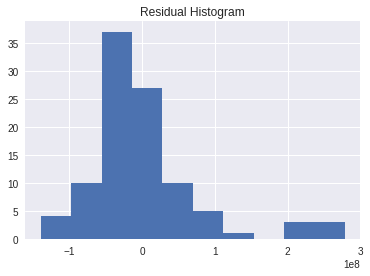

In [266]:
error = y - pred1
plt.hist(error)
plt.title("Residual Histogram")

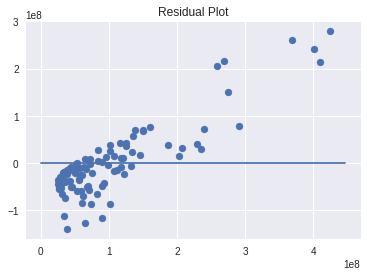

In [267]:
plt.plot(np.linspace(0,10**8.65,1000),np.linspace(0,0,1000))
plt.scatter(y, y - pred1)
plt.title("Residual Plot")

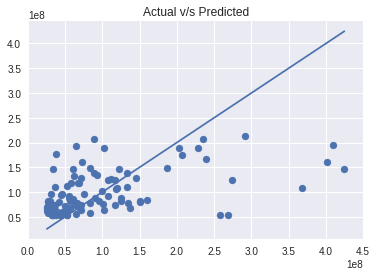

In [268]:
plt.figure()
plt.plot(y,y)
plt.scatter(y,pred1)
plt.title("Actual v/s Predicted")

In [285]:
r2 = r2_score(y, pred1)
r2

0.31182004607169611

### Challenge 3

In [274]:
movies.columns
movies = movies.fillna(0)
movies.dropna()
movies.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Runtime',
       'ReleaseDate', 'constant', 'Rating_G', 'Rating_PG', 'Rating_PG-13',
       'Rating_R'],
      dtype='object')

In [276]:
X=movies.loc[:,['Title','Budget',
       'Director', 'Runtime',
        'ReleaseDate','constant','Rating_G', 'Rating_PG', 'Rating_PG-13', 'Rating_R']]
y=movies['DomesticTotalGross']

selected_columns_1 = ['constant','Budget','Rating_G', 'Rating_PG', 'Rating_PG-13', 'Rating_R']
lr_model1 = LinearRegression()
lr_model1.fit(X.loc[:,selected_columns_1],y)

%matplotlib inline
lr_model1.coef_, lr_model1.intercept_

pred1 = lr_model1.predict(X.loc[:,selected_columns_1])

np.mean((pred1 - y)**2)

5203845227767208.0

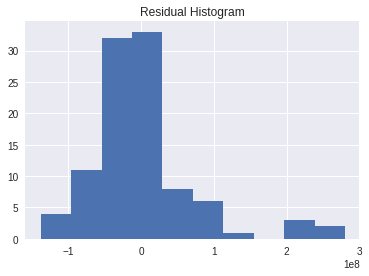

In [277]:
error = y - pred1
plt.hist(error)
plt.title("Residual Histogram")

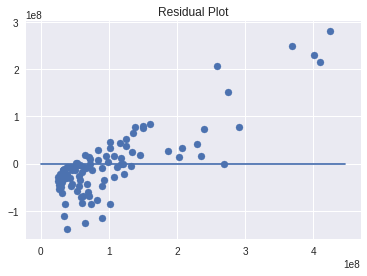

In [278]:
plt.plot(np.linspace(0,10**8.65,1000),np.linspace(0,0,1000))
plt.scatter(y, y - pred1)
plt.title("Residual Plot")

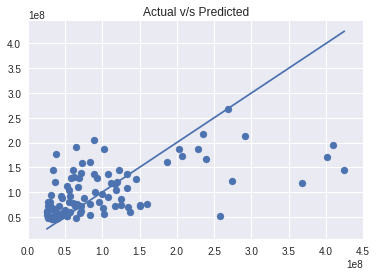

In [279]:
plt.figure()
plt.plot(y,y)
plt.scatter(y,pred1)
plt.title("Actual v/s Predicted")

In [284]:
r2 = r2_score(y, pred1)
r2

0.31182004607169611

### Challenge 4

In [327]:
movies.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [328]:
director = pd.get_dummies(data = movies, columns = ['Director','Rating'])

In [332]:
director1 = director.iloc[:,5:]
selected_columns_1 = director1.columns.tolist()

In [335]:
X=director1.loc[:,selected_columns_1]
y=director['DomesticTotalGross']

lr_model1 = LinearRegression()
lr_model1.fit(X.loc[:,selected_columns_1],y)

%matplotlib inline
lr_model1.coef_, lr_model1.intercept_

pred1 = lr_model1.predict(X.loc[:,selected_columns_1])

np.mean((pred1 - y)**2)

14441884891837.578

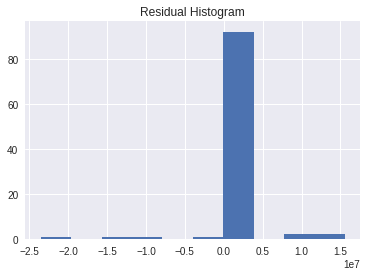

In [336]:
error = y - pred1
plt.hist(error)
plt.title("Residual Histogram")

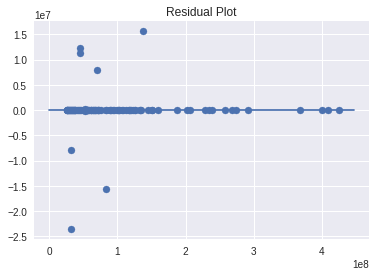

In [337]:
plt.plot(np.linspace(0,10**8.65,1000),np.linspace(0,0,1000))
plt.scatter(y, y - pred1)
plt.title("Residual Plot")

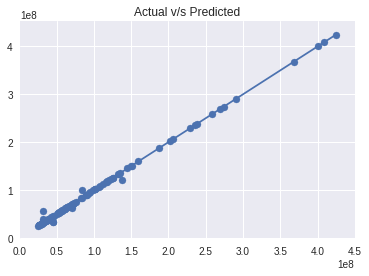

In [338]:
plt.figure()
plt.plot(y,y)
plt.scatter(y,pred1)
plt.title("Actual v/s Predicted")

In [339]:
r2 = r2_score(y, pred1)
r2

0.99809014003213026

### Challenge 5

In [343]:
director1 = director.iloc[:,5:]
selected_columns_1 = director1.columns.tolist()
X=director1.loc[:,selected_columns_1]
y=director['DomesticTotalGross']

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [356]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train.loc[:,selected_columns_1],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [359]:
pred1 = lr_model1.predict(X_test.loc[:,selected_columns_1])

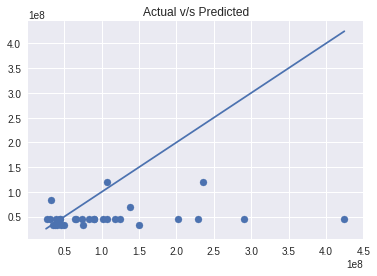

In [369]:
plt.figure()
plt.plot(y,y)
plt.scatter(y_test,pred1)
plt.title("Actual v/s Predicted")

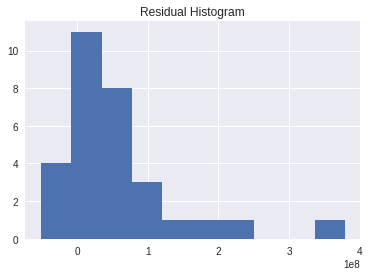

In [370]:
error = y_test - pred1
plt.hist(error)
plt.title("Residual Histogram")